In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import datetime

In [2]:
start = datetime.date(2020,1,1)
end = datetime.date.today()



nasdaq = web.DataReader('NASDAQ100', 'fred', start, end)
sap500 = web.DataReader('SP500', 'fred', start, end)
nasdaq.head(5)

,NASDAQ100
DATE,
2020-01-01,NaN
2020-01-02,8872.22
2020-01-03,8793.90
2020-01-06,8848.52
2020-01-07,8846.45


In [3]:
def log_returns(prices):
    returns = prices/prices.shift(1)
    return np.log(returns)

In [4]:
nasdaq_returns = log_returns(nasdaq)
nasdaq_returns = nasdaq_returns.dropna()
sap500_returns = log_returns(sap500)
sap500_returns = sap500_returns.dropna()

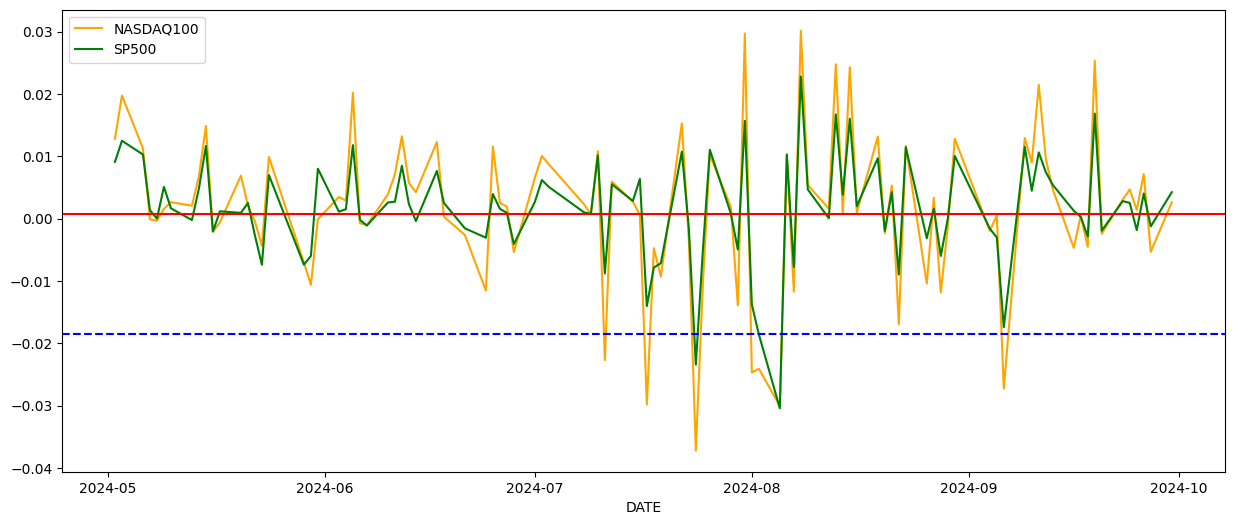

In [20]:
plt.figure(figsize=(15,6))
sns.lineplot(data=nasdaq_returns[-100:], palette=['orange'])
sns.lineplot(data=sap500_returns[-100:], palette=['green'])
plt.axhline(nasdaq_returns.values.mean(), color="red")
percentile = np.percentile(nasdaq_returns, 10)
plt.axhline(percentile, color="blue",label='Percentile 10%', linestyle='--')
plt.show() 